# Machine Learning HW#1
#### Student : 0556078 楊凱期


### Load required package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.metrics import confusion_matrix, accuracy_score

%matplotlib notebook

### Question 1:  
** (1) Plot the decision boundary for the 3-nearest neighbor algorithm **

In [2]:
h = .02

x = np.array([[0,0],[1,1],[-1,1],[1,-1],[-1,-1], [1,0],[-1,0],[0,1],[0,-1]])
y = np.array([1,1,1,1,1,-1,-1,-1,-1])

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

<IPython.core.display.Javascript object>


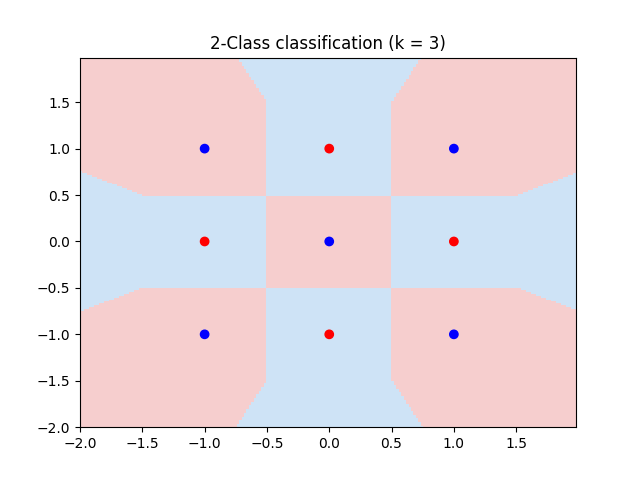

In [3]:
n_neighbors = 3

cmap_light = ListedColormap(['#F6CECE', '#CEE3F6'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(x, y)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
#plt.pcolormesh(xx, yy, Z)

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)
#plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)"
           % (n_neighbors))

plt.show()

** (2) What is the training set accuaracy for 3-nearest neighbor algorithm?**  
** Ans : 0.0% **

In [4]:
y_pred = clf.predict(x)
accuracy_score(y_pred, y)

0.0

#### (3) What is the confusion matrix for 3-nearest neighbor algorithm on the training set?

In [5]:
confusion_matrix(y_pred, y)

array([[0, 5],
       [4, 0]])

### Question 2:  
** Let the \\(A ∈ R^{n×n}\\) be a symmetric positive definite matrix. Show that all eigenvalues of matrix A are positive. **

** Prove:**  
$\forall\lambda,\lambda$ is an eigen value of $A.$  
$\exists\vec{v}\neq\vec{0}$ s.t. $A\vec{v}=\lambda\vec{v}$  
we know that $\langle A\vec{v},\vec{v}\rangle > 0 $     $\because$ A is positive definite matrix.  
then $\langle A\vec{v},\vec{v}\rangle = \langle\lambda\vec{v},\vec{v}\rangle
= \lambda\langle\vec{v},\vec{v}\rangle = \lambda\lVert{\vec{v}}\rVert^{2} > 0 $   
$\because \vec{v}\neq\vec{0}$  
$\therefore \lVert{\vec{v}}\rVert^{2} > 0$    
Thus, $\lambda > 0$  

### Question 3:   
** Let $Z = [X_{1} ; X_{2} ; X_{3} ]$ be a random vector and $\Sigma$ be a matrix with size
3 × 3 where $\Sigma_{ij} = Cov(X_{i} , X_{j} ) $ and $\Sigma_{ii} = Var(X_{i})$. Let the random
variable $W = a_{T}Z = a_{1} X_{1} + a_{2} X_{2} + a_{3} X_{3}$ where $a = [a_{1} ; a_{2} ; a_{3} ]$. i.e.,
the random variable W is the projection of random vector Z onto the
vector a. Find the variance of W . **

** Prove:**  
$Var(W) = Var(\vec{a}^{T}Z)$  
$=E[(\vec{a}^{T}Z-E[\vec{a}^{T}Z])(\vec{a}^{T}Z-E[\vec{a}^{T}Z])^{T}]$  
$=E[(\vec{a}^{T}Z-\vec{a}^{T}E[Z])(\vec{a}^{T}Z-\vec{a}^{T}E[Z])^{T}]$  
$=E[(\vec{a}^{T}(Z-E[Z]))(\vec{a}^{T}(Z-E[Z]))^{T}]$  
$=E[\vec{a}^{T}(Z-E[Z])(Z-E[Z])^{T}\vec{a}]$  
$=\vec{a}^{T}E[(Z-E[Z])(Z-E[Z])^{T}]\vec{a}$  
$=\vec{a}^{T}\Sigma\vec{a}$

### Question 4:  
** (a) sample size = 10**  
** mean: -0.16188 **  
** std: 0.36175 **  

** (b) sample size = 1000**  
** mean: -0.00633 **  
** std: 0.02905 **  

<IPython.core.display.Javascript object>


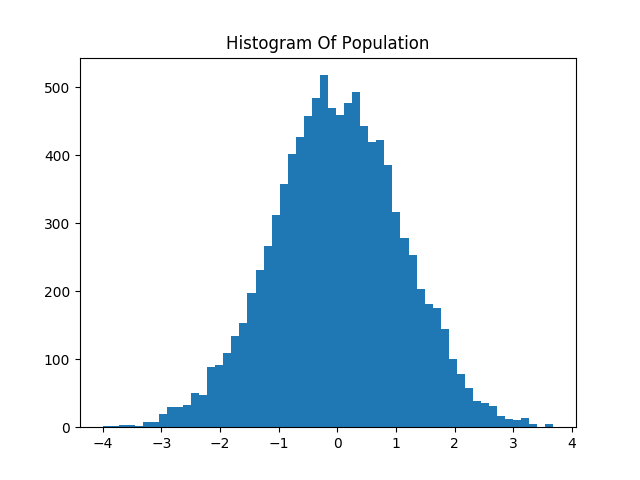

In [6]:
pop = np.random.normal(0.0, 1.1, 10000)
plt.hist(pop, bins='auto') 
plt.title("Histogram Of Population")
plt.show()

<IPython.core.display.Javascript object>


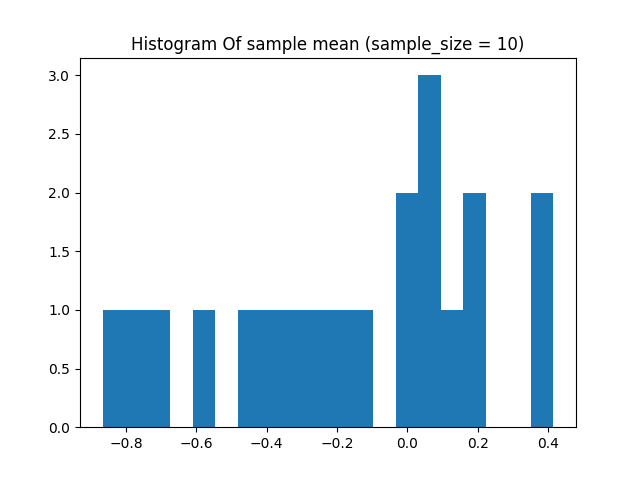

In [7]:
sam_mean = []
for i in range(20):
    s = np.random.choice(pop, size=10, replace=False)
    sam_mean.append(np.mean(s))
sam_mean = np.array(sam_mean)

plt.hist(sam_mean, bins=20) 
plt.title("Histogram Of sample mean (sample_size = 10)")
plt.show()

In [8]:
print('mean : {:.5f}'.format(np.mean(sam_mean)))
print('std  : {:.5f}'.format(np.std(sam_mean)))

mean : -0.16188
std  : 0.36175


<IPython.core.display.Javascript object>


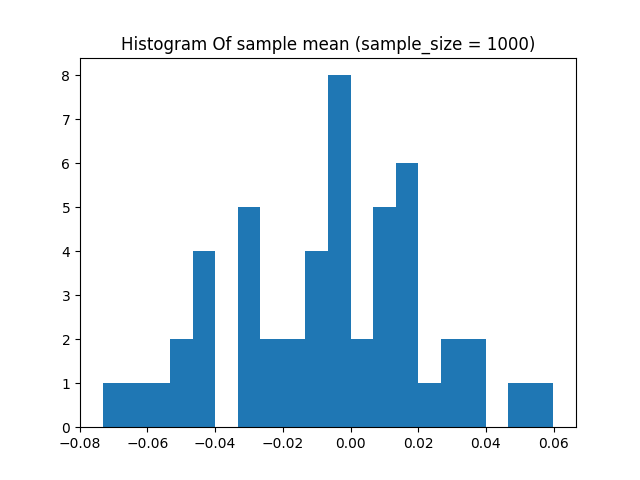

In [9]:
sam_mean = []
for i in range(50):
    s = np.random.choice(pop, size=1000, replace=False)
    sam_mean.append(np.mean(s))
sam_mean = np.array(sam_mean)

plt.hist(sam_mean, bins=20) 
plt.title("Histogram Of sample mean (sample_size = 1000)")
plt.show()

In [10]:
print('mean : {:.5f}'.format(np.mean(sam_mean)))
print('std  : {:.5f}'.format(np.std(sam_mean)))

mean : -0.00633
std  : 0.02905


### Question 5:  
** least squares solution $\vec{w}=(A^{T}A)^{-1}A^{T}\vec{y}$**  
** $\vec{w} = (x_{1}, x_{2}, x_{3}) = (1.3919, 2.7379, 0.9542)$**

In [11]:
A = np.matrix([[2,2,-1],
               [1,-1,2],
               [1,2,-2],
               [4,-1,-3]])
y = np.matrix([[8],[0],[4],[0]])
w = (A.T*A).I*A.T*y

In [12]:
w

matrix([[ 1.39185751],
        [ 2.73791349],
        [ 0.95419847]])

### Question 6:  
** (b) **  
** $f(x)=2.06x_1^{2}+1.28x_2^{2}+1.54x_{1}x_{2}+1.01x_{1}+2.06x_{2} + 0.00$ **

** (c) **  
** MAE = 0.77811 **

<IPython.core.display.Javascript object>


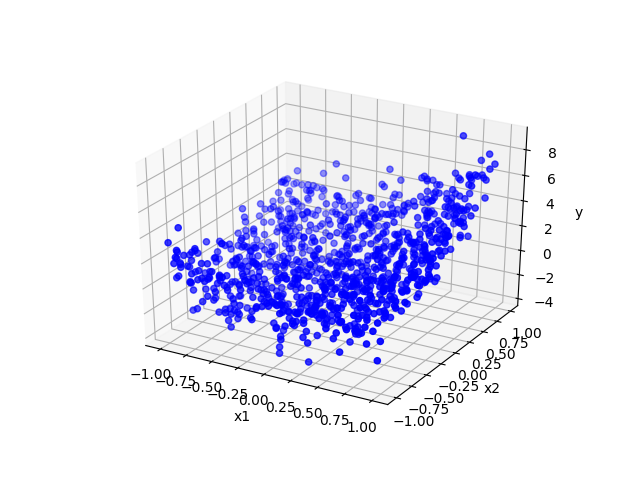

In [13]:
x1 = np.random.uniform(-1,1,1000)
x2 = np.random.uniform(-1,1,1000)
x = np.dstack((x1, x2))[0]

y = 2*np.power(x1, 2) + np.power(x2, 2) + 1.5*x1*x2 + x1 + 2*x2 + np.random.normal(0, 1, len(x))

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, x2, y, c='b', marker='o')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

plt.show()

In [14]:
X = np.matrix([np.power(x1, 2), np.power(x2, 2), x1*x2, x1, x2, np.ones(len(x))]).transpose()

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit (X, y)

reg.coef_

array([ 2.0554139 ,  1.28068327,  1.53651098,  1.01186799,  2.05678116,  0.        ])

<IPython.core.display.Javascript object>


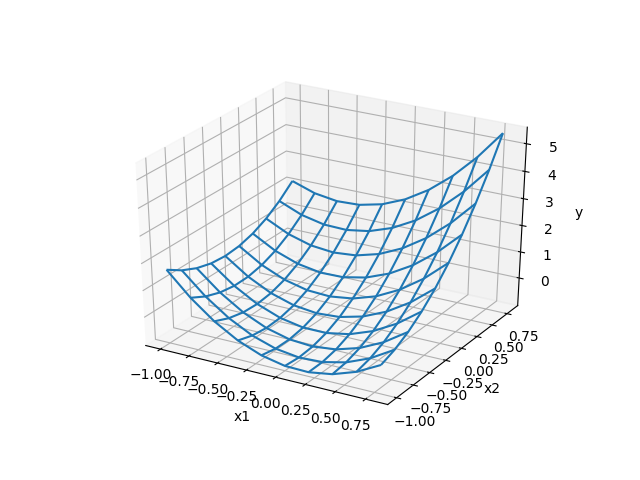

In [15]:
xx, yy = np.meshgrid(np.arange(-1, 1, 0.2),
                     np.arange(-1, 1, 0.2))
#y_ = reg.predict(np.c_[xx.ravel(), yy.ravel()])

tx = np.c_[xx.ravel(), yy.ravel()]
x_ = np.matrix([np.power(tx[:,0], 2), np.power(tx[:,1], 2), 
                tx[:,0]*tx[:,1], tx[:,0], tx[:,1], np.ones(len(tx[:,0]))]).transpose()
y_ = reg.predict(x_)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(x1, x2, y, c='b', marker='o')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.plot_wireframe(xx, yy, y_.reshape(10,10))

plt.show()

In [16]:
y_pred = reg.predict(X)

print('MAE = {:.5f}'.format(np.mean(np.abs(y-y_pred))))

MAE = 0.77811
